# Обработка результатов к работе 3.5.1

### Удовин Илья, 874

In [86]:
import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
%matplotlib notebook
from lab import *
f = lambda x, a, b: a*x + b
g = lambda x, a, b, c: a * np.tanh(b * x) + c * x
h = lambda x, p: np.dot([x**i for i in range(len(p)-1,-1,-1)], p)

data = {}
objects = os.listdir('.')
for name in objects:
    if name.endswith('.csv'):
        data[name[:-4]] = pd.read_csv(name, sep=',', header=None)

print('Data is ready!')

Data is ready!


## Вольт-амперная характеристика разряда

<IPython.core.display.Javascript object>


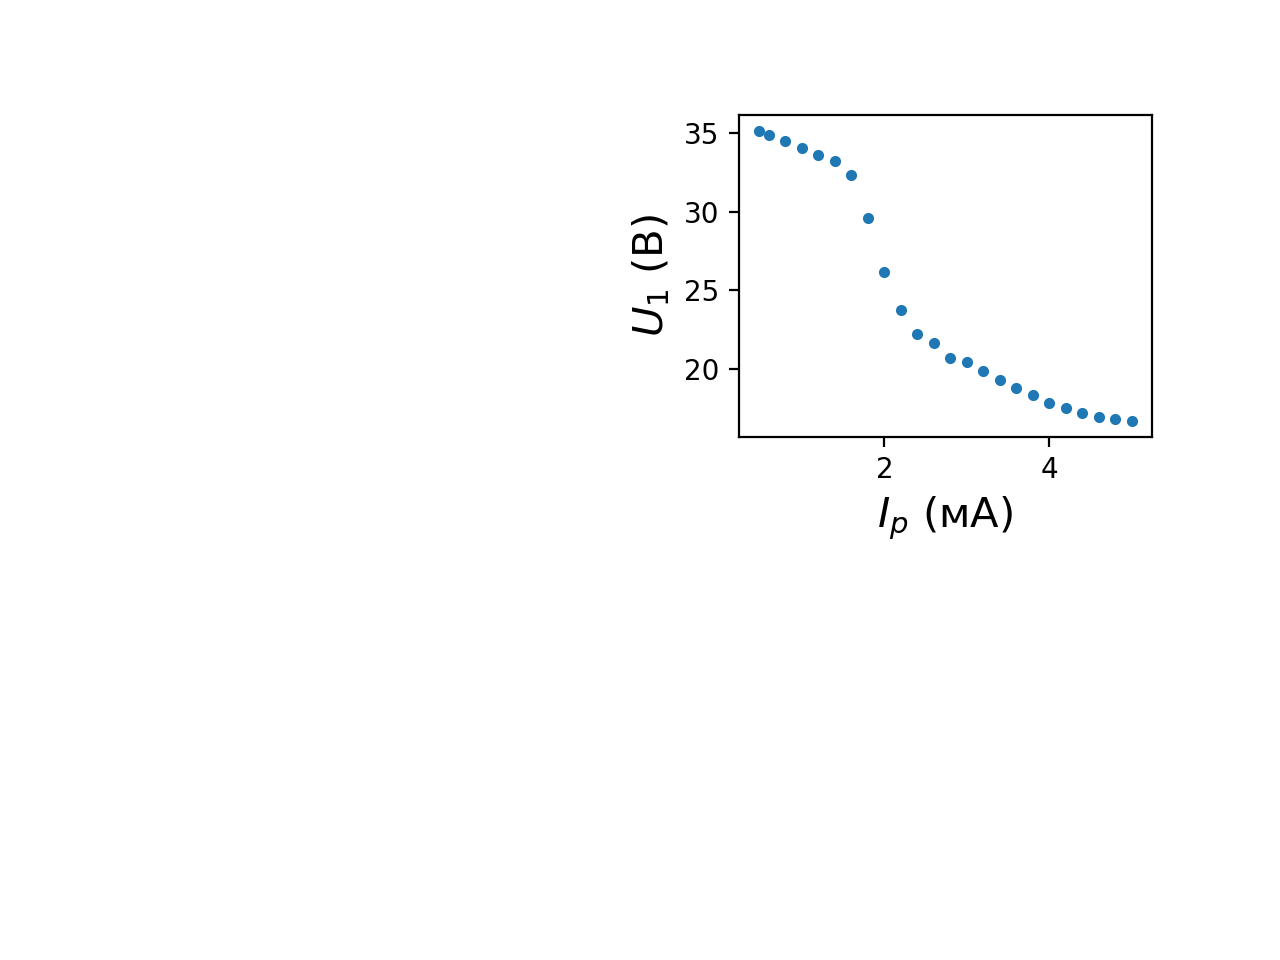

,"$I_р$, мА","$U$, В"
0,0.48,35.15
1,0.80,34.50
2,1.00,34.05
3,1.20,33.58
4,1.40,33.20


<IPython.core.display.Math object>

In [87]:
p = np.array(data['IU1'])
I_d = p[0] * 0.04 
U_1 = p[1]

sigma_I = 0.02
sigma_U = 0.05

#create_plot('', r'$I_р$ (мА)', r'$U_1$ (В)', 'L', 2)
#plt.yticks(np.arange(15, 36, 5))
#plt.errorbar(I_d, U_1, linestyle='', marker='o', xerr=sigma_I, yerr=sigma_U)

grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)
p = plt.subplot(grid[0, 1])
p.set_xlabel('$I_p$ (мА)', fontsize=15)
p.set_ylabel('$U_1$ (В)', fontsize=15)
p.errorbar(I_d, U_1, linestyle='', marker='.', xerr=sigma_I, yerr=sigma_U)

R = [(U_1[k] - U_1[k-1]) / (I_d[k] - I_d[k-1]) for k in range(1, len(U_1))]
R = np.abs(R)

df = np.transpose(np.array([I_d, U_1]))
df = pd.DataFrame(df, columns=['$I_р$, мА', '$U$, В'])
display(df.head())
display(Math('$R_{{max}}={:.2f}$'.format(max(R))))

## Зондовые характеристики

<IPython.core.display.Javascript object>


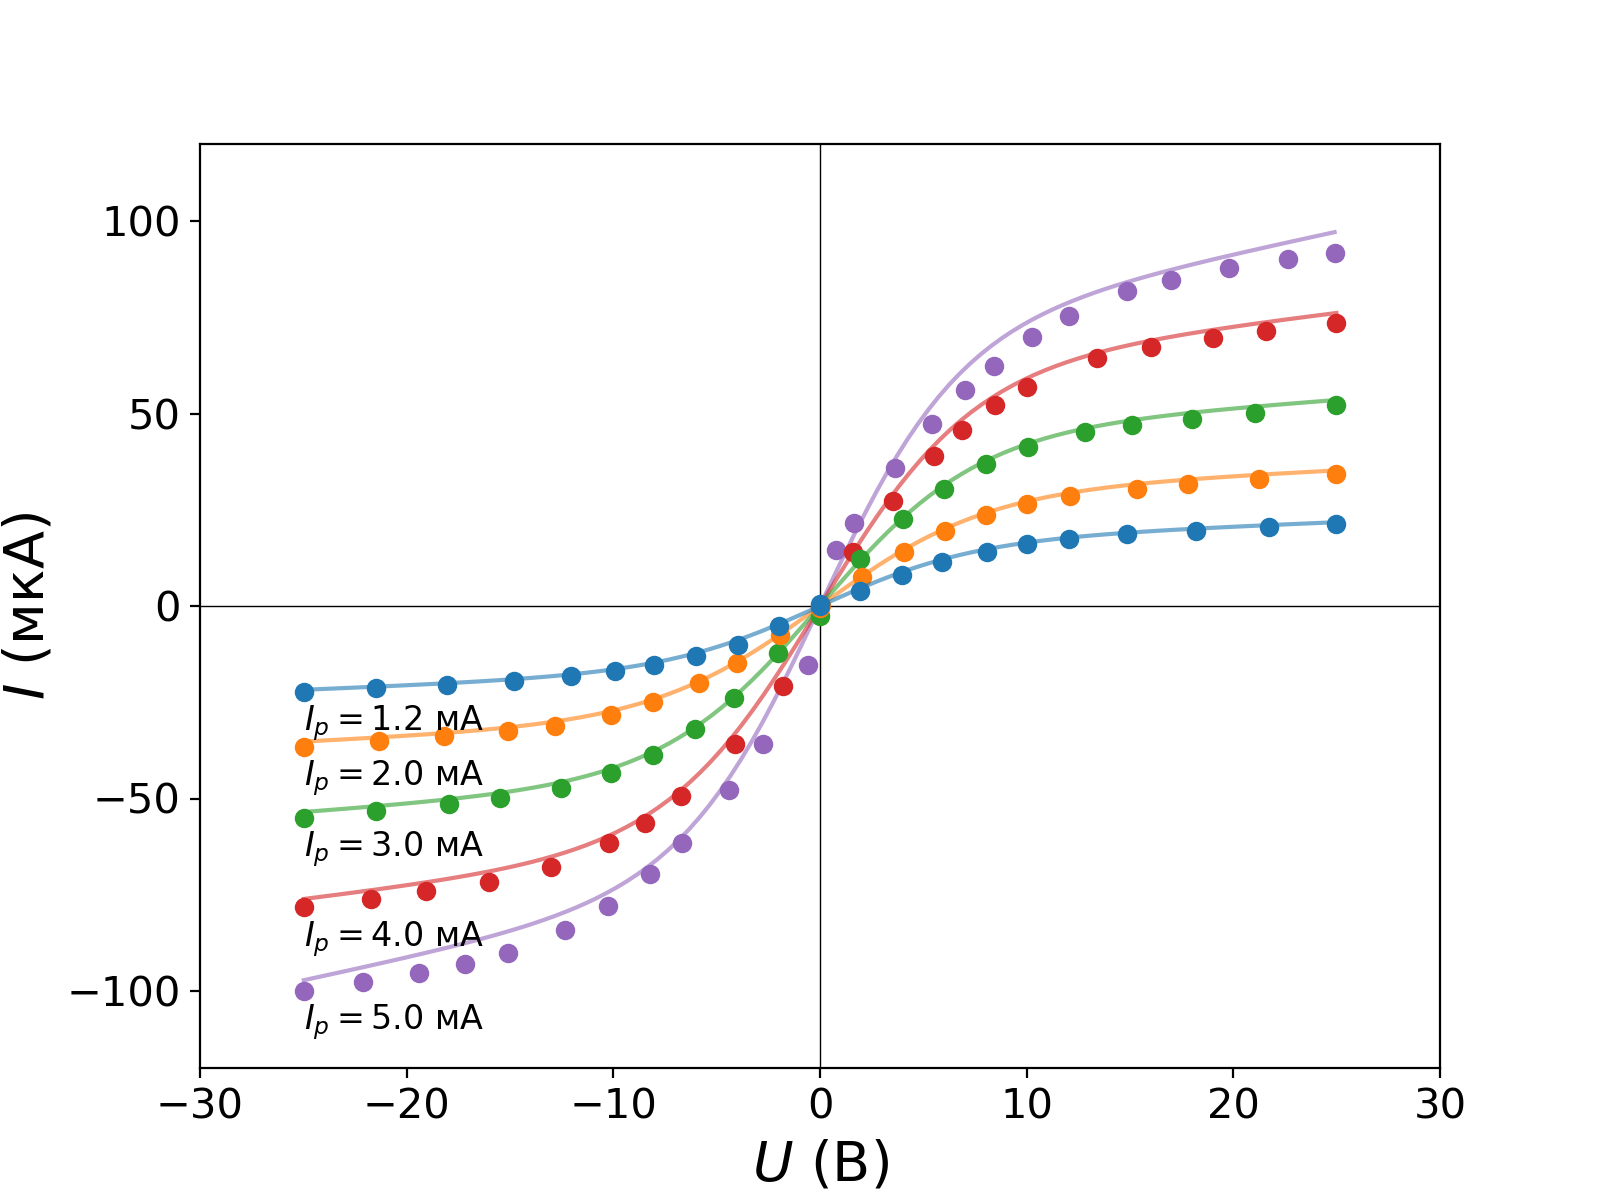

In [119]:
I_d = np.array([1.2, 2, 3, 4, 5])
k = [11, 11, 10, 10, 13]

OPTs = []
COVs = []


plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('$U$ (В)', fontsize=20)
plt.ylabel('$I$ (мкА)', fontsize=20)

plt.plot([0, 0], [-150, 150], linewidth=0.5, color='0')
plt.plot([-40, 50], [0, 0], linewidth=0.5, color='0')
plt.xlim(-30, 30)
plt.ylim(-120, 120)

for i in range(len(I_d)-1, -1, -1):
    p = np.array(data['z'+str(i+1)])
    if i % 2 == 0:
        I = np.append(p[0][:k[i]], -p[0][k[i]:])
        U = np.append(p[1][:k[i]], -p[1][k[i]:])
    else:
        if i == 3:
            I = np.append(-p[0][:10], p[0][11:-1])
            U = np.append(-p[1][:10], p[1][11:-1])
        else:
            I = np.append(-p[0][:k[i]], p[0][k[i]:])
            U = np.append(-p[1][:k[i]], p[1][k[i]:])
    U = np.sort(U)
    I = np.sort(I)
    
    if i == 4:
        opt1, cov1 = curve_fit(g, U, I)
        opt, cov = opt1, cov1
    else:
        opt, cov = curve_fit(g, U, I, opt1)
    OPTs.append(opt)
    COVs.append(cov)
    g_true = lambda x: g(x, *opt)
    x = np.linspace(min(U), max(U), 100)
    plt.plot(x, g_true(x), color='C'+str(i), alpha=0.6)
    lbl = '$I_{{р}}={:.1f}$ мА'.format(I_d[i])
    plt.plot(U, I, linestyle='', marker='o', color='C'+str(i), label=lbl)
    txt = '$I_{iн}'+'= {:.2f}$ мкА\n $e/(2kT_e)={:.3f}$'.format(*opt[:2]) 
    plt.text(min(U), min(I)-3, lbl, verticalalignment='top', fontsize=12)

$$I = I_{iн}\text{th}\frac{eU}{2kT_e}+AU$$

## Погрешности параметров зондовых характеристик

In [120]:
df = []
for i in range(len(OPTs)):
    opt = OPTs[i]
    cov = COVs[i]
    row = [*opt, math.sqrt(cov[0,0]), math.sqrt(cov[1,1]), math.sqrt(cov[2,2])]
    df.append(row)
display(pd.DataFrame(df, 
        columns=['$a$', '$b$', '$c$', '$\sigma_a$', '$\sigma_b$', '$\sigma_c$']))

,$a$,$b$,$c$,$\sigma_a$,$\sigma_b$,$\sigma_c$
0,68.817830,0.149247,1.139192,8.330708,0.021640,0.406664
1,60.226011,0.135559,0.640908,5.906122,0.014433,0.277013
2,44.110884,0.131933,0.380715,2.972154,0.009398,0.139255
3,29.013514,0.125139,0.252301,2.269568,0.009854,0.103986
4,16.440455,0.133422,0.214743,1.387933,0.012141,0.064837


## Температура и концентрация

$$n_e = \frac{I_{iн}}{0,4eS}\sqrt{\frac{m_i}{2kT_e}}\hspace{10pt} [СИ]$$

<IPython.core.display.Javascript object>


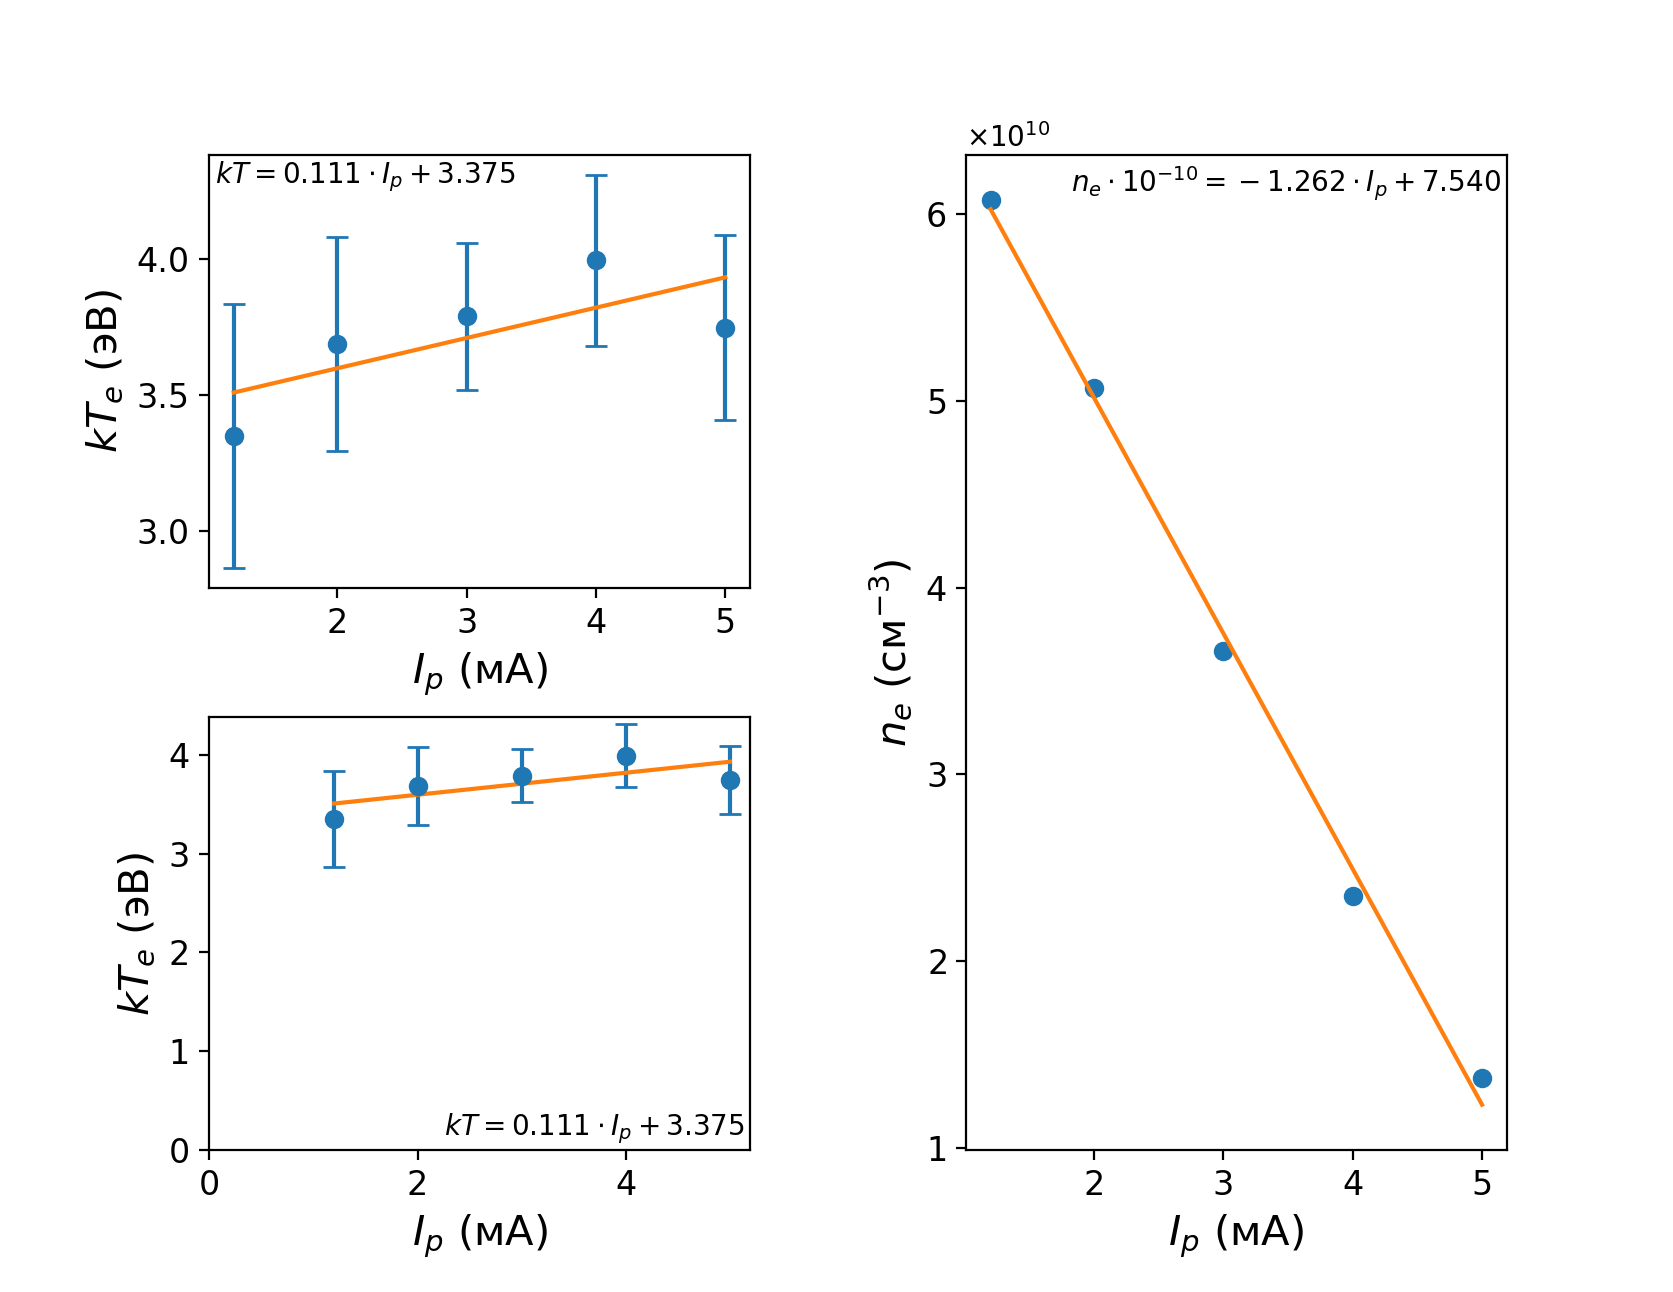

,"$I_р$, мА",$kT_e$,"$n_e$, см$^{-3}$",$\sigma_{kT}$,$\sigma_n$
0,1.2,3.350144,6.074303e+10,0.485744,4.403627e+09
1,2.0,3.688440,5.066289e+10,0.392702,2.696998e+09
2,3.0,3.789788,3.660711e+10,0.269961,1.303834e+09
3,4.0,3.995553,2.344980e+10,0.314628,9.232723e+08
4,5.0,3.747509,1.372049e+10,0.341025,6.242862e+08


In [121]:
# температура

e = 1
I_0 = np.array([opt[0] for opt in OPTs])
e_2kT = np.array([opt[1] for opt in OPTs])

kT = e / (2*e_2kT)

eps_kT = np.array([math.sqrt(COVs[i][1, 1]) / OPTs[i][1] for i in range(len(OPTs))])
sigma_kT = eps_kT * kT


grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

axes = [plt.subplot(grid[0, 0]), plt.subplot(grid[1, 0])]

for p in axes:
    p.set_xlabel('$I_p$ (мА)', fontsize=15)
    p.set_ylabel('$kT_e$ (эВ)', fontsize=15)
    p.tick_params(axis='both', which='major', labelsize=12)
    p.errorbar(I_d, kT, linestyle='', marker='o', yerr=sigma_kT, capsize=4)
    opt, cov = curve_fit(f, I_d, kT)
    p.plot(I_d, f(I_d, *opt))
    txt = '$kT={:.3f}\cdot I_р+{:.3f}$'.format(*opt)
    
plt1, plt2 = axes
xx, yy = plt1.get_xlim(), plt1.get_ylim()
plt1.text(xx[0] + (xx[1] - xx[0]) * 1e-2 , yy[1] - (yy[1] - yy[0]) * 1e-2, txt, 
           verticalalignment='top', horizontalalignment='left', fontsize=10)

plt2.set_xlim(0, xx[1])
plt2.set_ylim(0, yy[1])
xx, yy = plt2.get_xlim(), plt2.get_ylim()
plt2.text(xx[1] - (xx[1] - xx[0]) * 1e-2 , yy[0] + (yy[1] - yy[0]) * 1e-2, txt, 
           verticalalignment='bottom', horizontalalignment='right', fontsize=10)


# концентрация

m = 22 * 1.66e-27
S = math.pi * 0.2 * 5.2 * 1e-6

n_e = I_0*1e-6 / (0.4 * 1.6e-19 * S) * np.sqrt(m/(kT*3.2e-19))  # СИ
n_e *= 1e-6

eps_n = eps_kT / 2
sigma_n = eps_n * n_e

plt3 = plt.subplot(grid[0:, 1])
plt3.set_xlabel('$I_p$ (мА)', fontsize=15)
plt3.set_ylabel('$n_e$ (см$^{-3}$)', fontsize=15)
plt3.tick_params(axis='both', which='major', labelsize=12)
plt3.ticklabel_format(axis='y', style='sci', useMathText=True)

plt3.plot(I_d, n_e, linestyle='', marker='o')

p = np.polyfit(I_d, n_e, 1)
plt3.plot(I_d, [np.dot([i, 1], p) for i in I_d])
txt = '$n_e\cdot 10^{{-10}}={:.3f}\cdot I_р+{:.3f}$'.format(*p*1e-10)
xx = plt3.get_xlim()
yy = plt3.get_ylim()
plt3.text(xx[1] - (xx[1] - xx[0]) * 1e-2 , yy[1] - (yy[1] - yy[0]) * 1e-2, txt, 
           verticalalignment='top', horizontalalignment='right', fontsize=10)


df = np.transpose(np.array([I_d, kT, n_e, sigma_kT, sigma_n]))
df = pd.DataFrame(df, columns=['$I_р$, мА', '$kT_e$', '$n_e$, см$^{-3}$', '$\sigma_{kT}$', '$\sigma_n$'])
display(df)

## Частота колебаний, дебаевский радиус

$$\omega_p = \sqrt\frac{n_e e^2}{\varepsilon_0 m_e}$$

$$r_D = \sqrt\frac{\varepsilon_0 kT_i}{ne^2}$$

$$n = n_i + n_e \simeq 2n_e$$

<IPython.core.display.Javascript object>


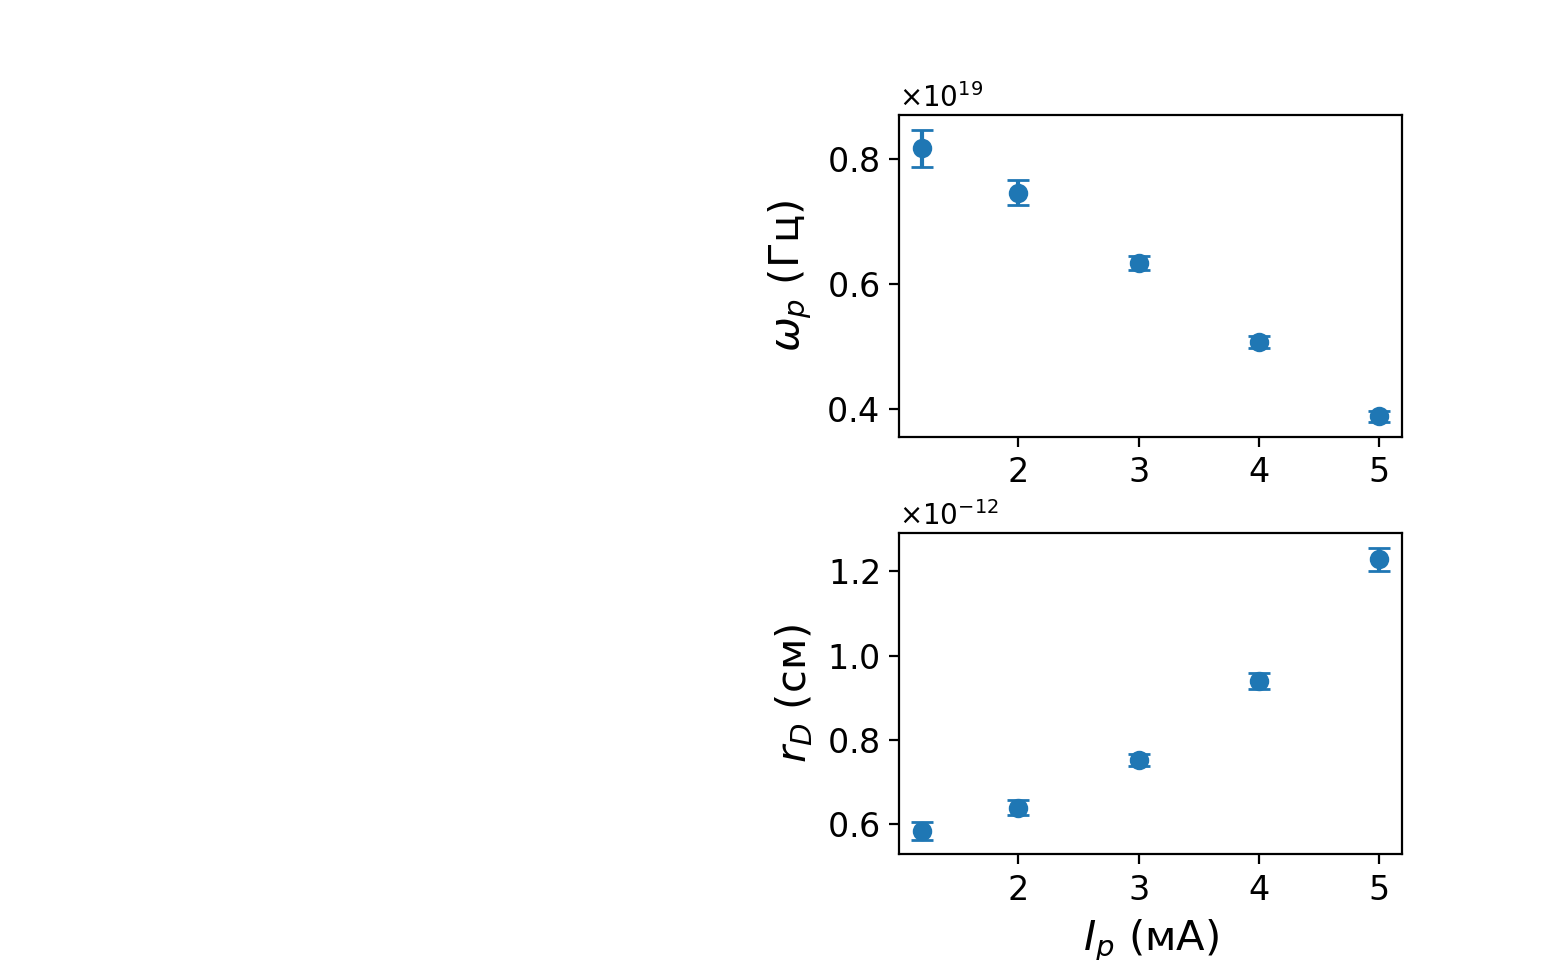

,$I_р$,$\omega_p$,$r_D$
0,1.2,8.165828e+18,5.837635e-13
1,2.0,7.457564e+18,6.392051e-13
2,3.0,6.339205e+18,7.519733e-13
3,4.0,5.073662e+18,9.395408e-13
4,5.0,3.880939e+18,1.228288e-12


In [126]:
eps0 = 1
m_e = 9.10953e-28
T_i = 300
k = 1.38e-23


grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)
axes = [plt.subplot(grid[0, 1]), plt.subplot(grid[1, 1])]

#fig, axes = plt.subplots(2, 1, sharex='col', sharey='row')

for p in axes:
    p.set_xticks(range(1, 6))
    p.tick_params(axis='both', which='major', labelsize=12)
    p.tick_params(axis='both', which='major', labelsize=12)


plt1, plt2 = axes

plt1.ticklabel_format(axis='y', style='sci', useMathText=True)
plt2.ticklabel_format(axis='y', style='sci', useMathText=True)

# частота
omega = np.sqrt(n_e*(e*1.6e-19)**2 / (eps0*m_e))

eps_omega = eps_n / 2
sigma_omega = eps_omega * omega

plt1.set_ylabel('$\omega_p$ (Гц)', fontsize=15)
plt1.errorbar(I_d, omega, linestyle='', marker='o', yerr=sigma_omega, capsize=4)


# дебаевский радиус
#r_D = np.sqrt(eps0*k*T_i / (2*n_e*e))
r_D = np.sqrt(k*T_i*1.6e-19 / (2*n_e))

eps_rD = eps_n / 2
sigma_rD = eps_rD * r_D

plt2.set_xlabel('$I_p$ (мА)', fontsize=15)
plt2.set_ylabel('$r_D$ (см)', fontsize=15)
plt2.errorbar(I_d, r_D, linestyle='', marker='o', yerr=sigma_rD, capsize=4)


display(pd.DataFrame(np.transpose([I_d, omega, r_D]), columns=['$I_р$', '$\omega_p$', '$r_D$']))